In [1]:
# INSTALLING NLTK, GENSIM AND WORDCLOUD
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install --upgrade pip
!pip install nltk
!pip install gensim
!pip install sklearn
!pip install wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

In [2]:
df = pd.read_csv('resume_data.csv', encoding = 'latin-1')
df

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...
...,...,...,...
120,resume_121,not_flagged,\rBrattleboro VT - Email me on Indeed: indeed....
121,resume_122,not_flagged,\rResearch and Teaching Assistant - University...
122,resume_123,not_flagged,\rMedical Coder - Highly Skilled - Entry Level...
123,resume_124,flagged,\rWaterbury VT - Email me on Indeed: indeed.co...


In [3]:
df = df[['resume_text', 'class']]
df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   resume_text  125 non-null    object
 1   class        125 non-null    object
dtypes: object(2)
memory usage: 2.1+ KB


In [5]:
df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [6]:
# HERE WE OBSERVE, WE HAVE NO NULL POINTS IN OUR DATASET
df['class'] = df['class'].apply(lambda x:1 if x == 'flagged' else 0)
df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,0
1,\rEngineer / Scientist - IBM Microelectronics ...,0
2,\rLTS Software Engineer Computational Lithogra...,0
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,0
4,\rIndependent Consultant - Self-employed\rBurl...,1
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,0
121,\rResearch and Teaching Assistant - University...,0
122,\rMedical Coder - Highly Skilled - Entry Level...,0
123,\rWaterbury VT - Email me on Indeed: indeed.co...,1


In [7]:
# PREMOVING UNNECESSARY WORDS FROM DATASET

df['resume_text'] = df['resume_text'].apply(lambda x: x .replace('\r', ''))

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = stopwords.words('english')

stop_words.extend(['from', 'subject', 'edu', 're', 'use', 'email', 'com'])

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saimo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saimo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df

,resume_text,class
0,Customer Service Supervisor/Tier - Isabella Ca...,0
1,Engineer / Scientist - IBM Microelectronics Di...,0
2,LTS Software Engineer Computational Lithograph...,0
3,TUTORWilliston VT - Email me on Indeed: indee...,0
4,Independent Consultant - Self-employedBurlingt...,1
...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0
121,Research and Teaching Assistant - University o...,0
122,Medical Coder - Highly Skilled - Entry LevelSu...,0
123,Waterbury VT - Email me on Indeed: indeed.com/...,1


In [9]:
df['cleaned'] = df['resume_text'].apply(preprocess)
df

,resume_text,class,cleaned
0,Customer Service Supervisor/Tier - Isabella Ca...,0,customer service supervisor tier isabella cata...
1,Engineer / Scientist - IBM Microelectronics Di...,0,engineer scientist ibm albert gregoritsch ecaw...
2,LTS Software Engineer Computational Lithograph...,0,lts software engineer computational lithograph...
3,TUTORWilliston VT - Email me on Indeed: indee...,0,tutorwilliston alec schwartz awork college bio...
4,Independent Consultant - Self-employedBurlingt...,1,independent consultant self alex reutter fefwo...
...,...,...,...
120,Brattleboro VT - Email me on Indeed: indeed.co...,0,brattleboro bcc skilled presenter trainer micr...
121,Research and Teaching Assistant - University o...,0,research teaching assistant university cdd gra...
122,Medical Coder - Highly Skilled - Entry LevelSu...,0,medical coder highly skilled entry levelsudbur...
123,Waterbury VT - Email me on Indeed: indeed.com/...,1,waterbury bec fcwilling relocate work employer...


In [10]:
df['cleaned'][0]

'customer service supervisor tier isabella catalog companysouth burlington aecf work service supervisor tierisabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information assistant events coordinator office services assistanteileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintenance arranging aspects travel logistics catering interior design research pro

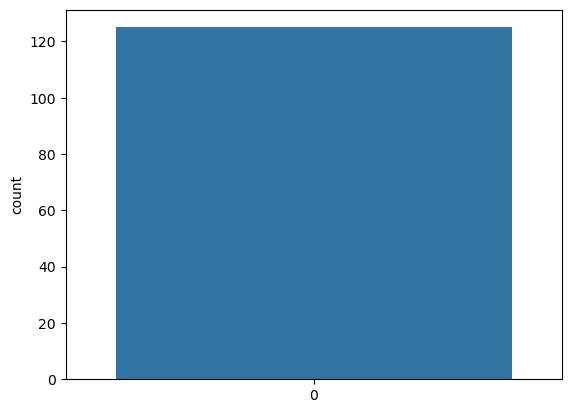

In [11]:
# PLOTTING COUNTS OF SAMPLE LABELLED AS 1 AND 0
sns.countplot(df['class'], label = 'Count Plot')
plt.show()

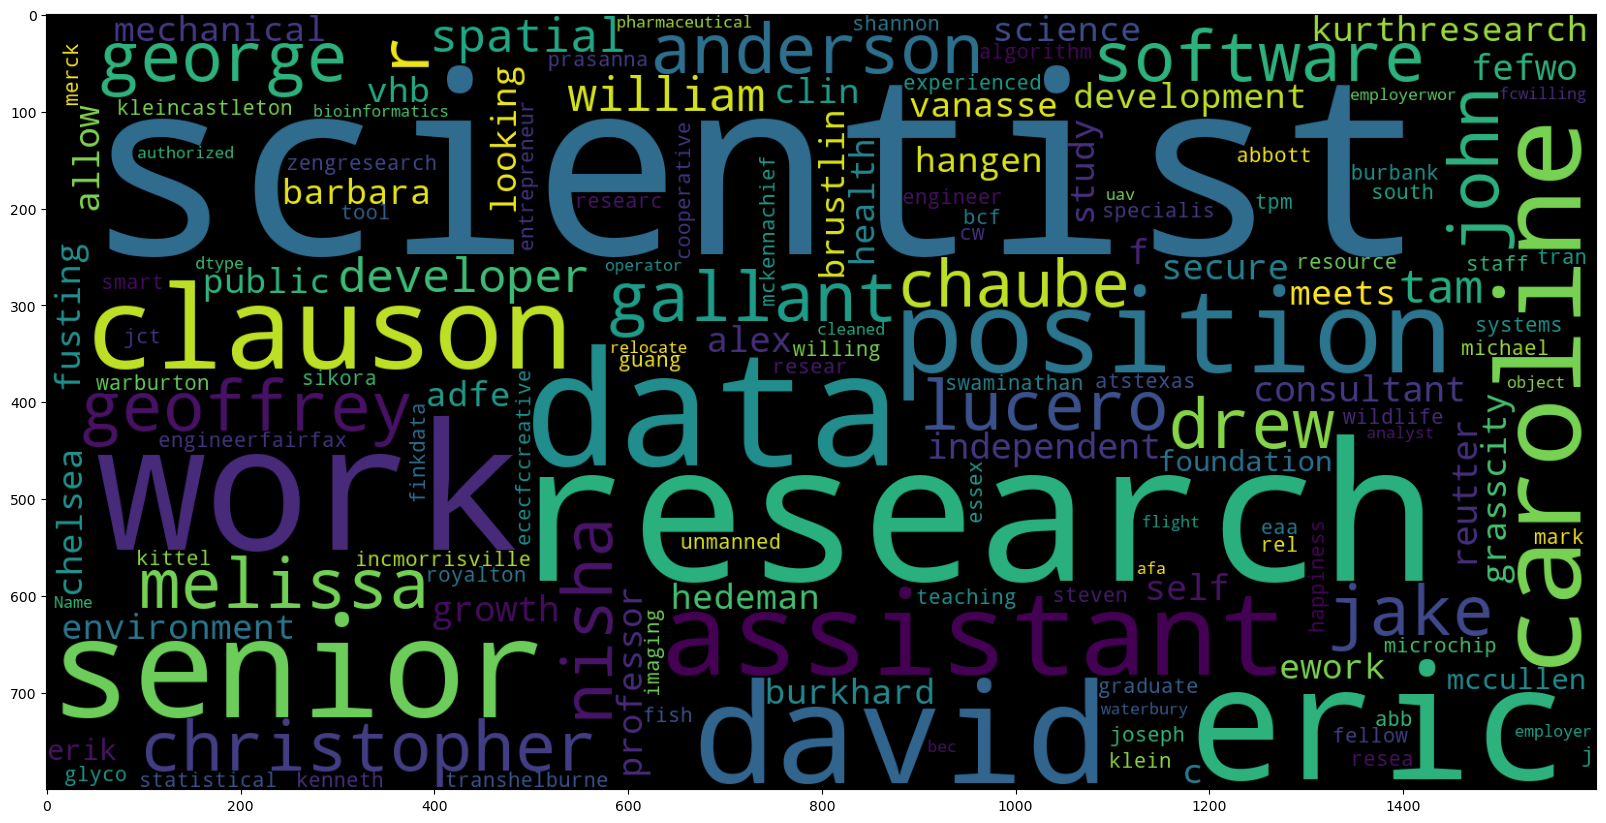

In [13]:
# PLOTTING THE WORDCLOUD:

# 1) FOR CLASS 1:

%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(df[df['class']==1].cleaned))

plt.imshow(wc)

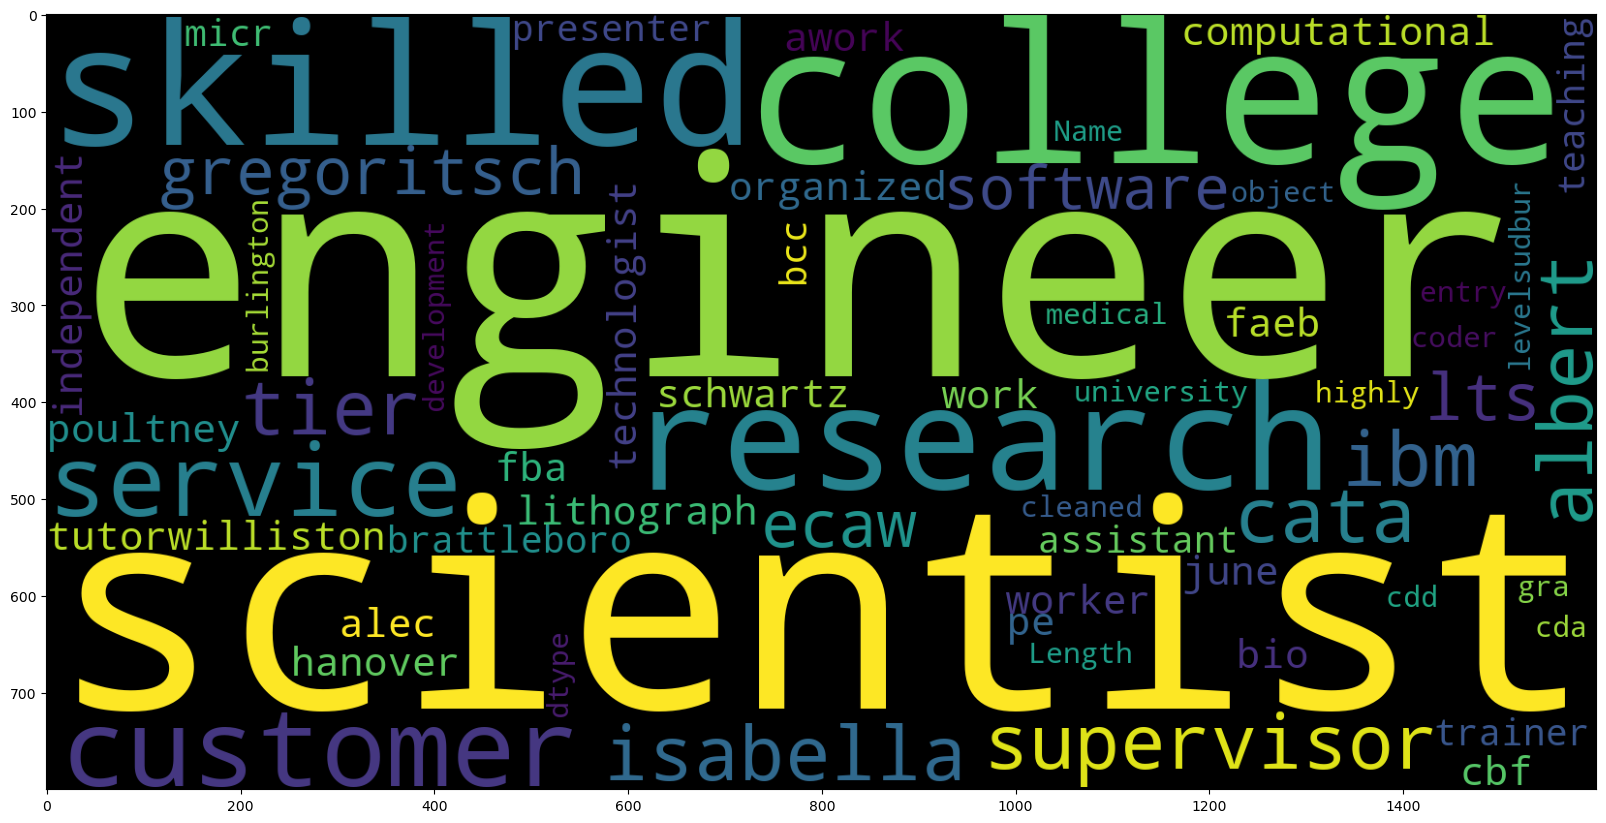

In [14]:
#1) FOR CLASS 0:

%matplotlib inline

plt.figure(figsize = (20, 20))

wc = WordCloud(max_words = 2000, width = 1600, height = 800, stopwords = stop_words).generate(str(df[df['class']==0].cleaned))

plt.imshow(wc)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' is your DataFrame and 'cleaned' is the column with cleaned text data
vectorizer = CountVectorizer()
countvectorizer = vectorizer.fit_transform(df['cleaned'])

# Use get_feature_names_out() instead of get_feature_names()
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [16]:
# PROCESSED DATA:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
X = countvectorizer
y = df['class']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


from sklearn.naive_bayes import MultinomialNB

Bayes_clf = MultinomialNB(alpha = 3)
Bayes_clf.fit(X_train, y_train)  ## Training the model

MultinomialNB(alpha=3)

### STEP 8: ASSESING THE TRAINED MODEL

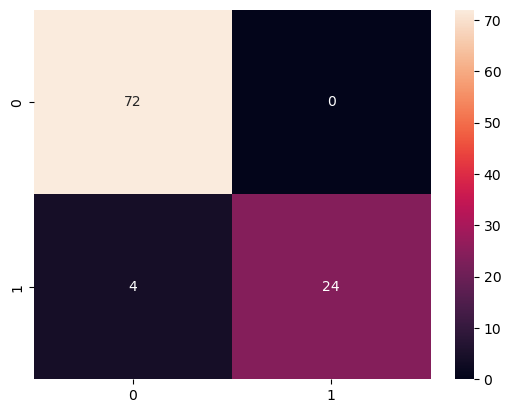

In [18]:
%matplotlib inline

# PLOTTING CONFUSION MATRIX:

# 1) FOR TRAINING DATA

y_pred_train = Bayes_clf.predict(X_train)

cm = confusion_matrix(y_train, y_pred_train)

sns.heatmap(cm, annot=True)

plt.show()

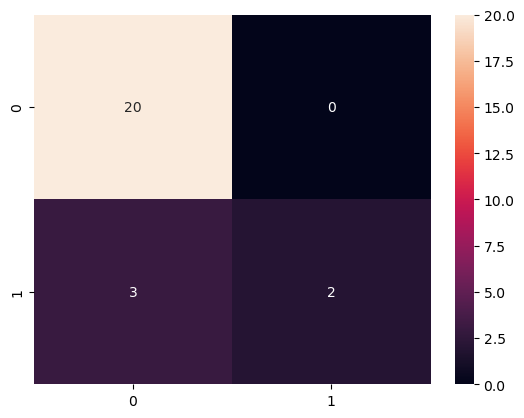

In [19]:
%matplotlib inline

# WE CAN SEE OUR MODEL PERFORMED REALLY WELL ON TRAINING DATA: IT CLASSFIED ALL OF THE POINTS CORRECTLY

# 2) FOR TEST DATA:

y_pred_test = Bayes_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)

sns.heatmap(cm, annot=True)

plt.show()

In [20]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.40      0.57         5

    accuracy                           0.88        25
   macro avg       0.93      0.70      0.75        25
weighted avg       0.90      0.88      0.86        25



In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("Accuracy of model on Train Dataset = {}".format(accuracy_score(y_train, y_pred_train)))
print("Accuracy of model on Test Dataset = {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy of model on Train Dataset = 0.96
Accuracy of model on Test Dataset = 0.88


In [22]:
print("Accuracy of model is = {}".format(accuracy_score(y_test, y_pred_test)))
print("F1 of model is = {}".format(f1_score(y_test, y_pred_test)))
print("Precision of model is = {}".format(precision_score(y_test, y_pred_test)))
print("Recall of model is = {}".format(recall_score(y_test, y_pred_test)))

Accuracy of model is = 0.88
F1 of model is = 0.5714285714285715
Precision of model is = 1.0
Recall of model is = 0.4
